<a href="https://colab.research.google.com/github/anishmahapatra01/CreditCardFraudCaseStudy/blob/master/Credit_Card_Fraud_Case_Study_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

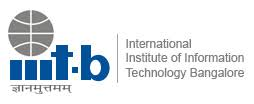


## Credit Card Fraud Case Study - CapStone Project
Authors: *Anish Mahapatra*, *Karthik Premanand*

email id: *anishmahapatra01@gmail.com, karthikprem26@gmail.com*






---




The aim of the Capstone Project is to predict fradulent credit card transactions with the help of machine learning models.


### Business Problem Overview
Business problem Overview
Banking fraud is a significant threat to the goad of retaining high profitable customers. It is an issue of substantial financial loss, both to the bank, as well as the customer. This can lead to lack of trust and credibility, which can lead to a high attrition rate. It is estimated that banking frauds account to $30 billion loss worldwide. With the rise of digital payments, the number of fraudulent transactions is also increasing in new and different ways.
In the BFSI industry, credit card fraud detection is a necessity to provide customers with proactive monitoring and fraud prevention mechanisms. Automating it helps to decrease time-consuming manual reviews, chargeback fees and denials of legitimate transactions.
 
### Problem Definition
Given a transaction, it is not immediately clear if it is a legitimate or illegitimate one. There are multiple factors at play such as the time, location, amount, frequency, last transaction time etc. among many other features. We understand that this is a binary classification problem to decide if the transaction is genuine or fraudulent.

Data from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/notebooks)

### Purpose of the notebook
The purpose of the notebook is to predict the customers that commit credit card fraud.



---


### Table of Contents

1.   Load the data, Sense Check of the Data
2.   Data Cleaning, Missing Value Treatment





In [25]:
# Importing the required packages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Hide warnings

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [27]:
# Since this notebook is from Google Colab, mounting Google Drive for authentication token
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Sense Checks of the Dataset

In [30]:
# Reading the Credit Card Case Study Dataset
creditCard = pd.read_csv('/content/drive/My Drive/CreditCardFraudCaseStudy-Data/creditcard.csv')

In [22]:
# Viewing the head of the dataset - Sense Check of the dataset
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# Viewing the shape of the data - (rows, columns)
creditCard.shape

(284807, 31)

In [33]:
# Summary of the dataset
print(creditCard.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
# Printing all the columns with atleast one null value
creditCard.columns[creditCard.isna().any()].tolist()

[]

We notice that we have 284,807 rows and 31 columns - all of them have the expected data types and there are no NULL values in the given dataset.


### Data Cleaning, Missing Value Treatment

In [123]:
# Making a copy of the dataset
df = creditCard.copy(deep=True)

In [79]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

In [38]:
# Visulalizing the percentage of missing values
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

,Feature,missing (%)
Time,Time,0.0
V1,V1,0.0
V2,V2,0.0
V3,V3,0.0
V4,V4,0.0
V5,V5,0.0
V6,V6,0.0
V7,V7,0.0
V8,V8,0.0
V9,V9,0.0


In [39]:
# Sense check of a random column
print(df['V28'].describe())

count    2.848070e+05
mean    -1.206049e-16
std      3.300833e-01
min     -1.543008e+01
25%     -5.295979e-02
50%      1.124383e-02
75%      7.827995e-02
max      3.384781e+01
Name: V28, dtype: float64


### Check for Data Imbalance of the "Class" column
1 - Fraud
0 - No Fraud

In [40]:
## Checking the count of churned customers
df['Class'].value_counts(ascending=True)

1       492
0    284315
Name: Class, dtype: int64

In [81]:
def plotFrequencyTable(df, catColName):
    '''
    This function is used to plot the frequency table of the specified categorical variable
    @df (dataframe) - Dataframe for which frequency table is to be plotted
    @catColName (string) - Column name for which frequency table is to be plotted
    '''
    sns.countplot(x=catColName, data=df)
    plt.title("Credit Card Fraud transactions")
    plt.xticks(rotation = 90)
    plt.show();

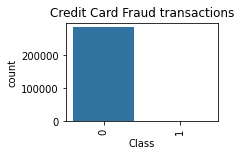

In [82]:
# plotting the frequency of 0-Normal and 1-Fraud transactions
plt.subplot(2,2,1)
plotFrequencyTable(df,'Class')


Here, we notice that the data is HIGHLY imbalanced. 

Just 0.17% (492 out of 284,807 transactions) of all transactions have been classified as fraud.

### Exploratory Data Analysis


#### Univariate and Bivariate Analysis

In [44]:
# Analysis of the target variable
df['Class'].value_counts(ascending=True)

1       492
0    284315
Name: Class, dtype: int64

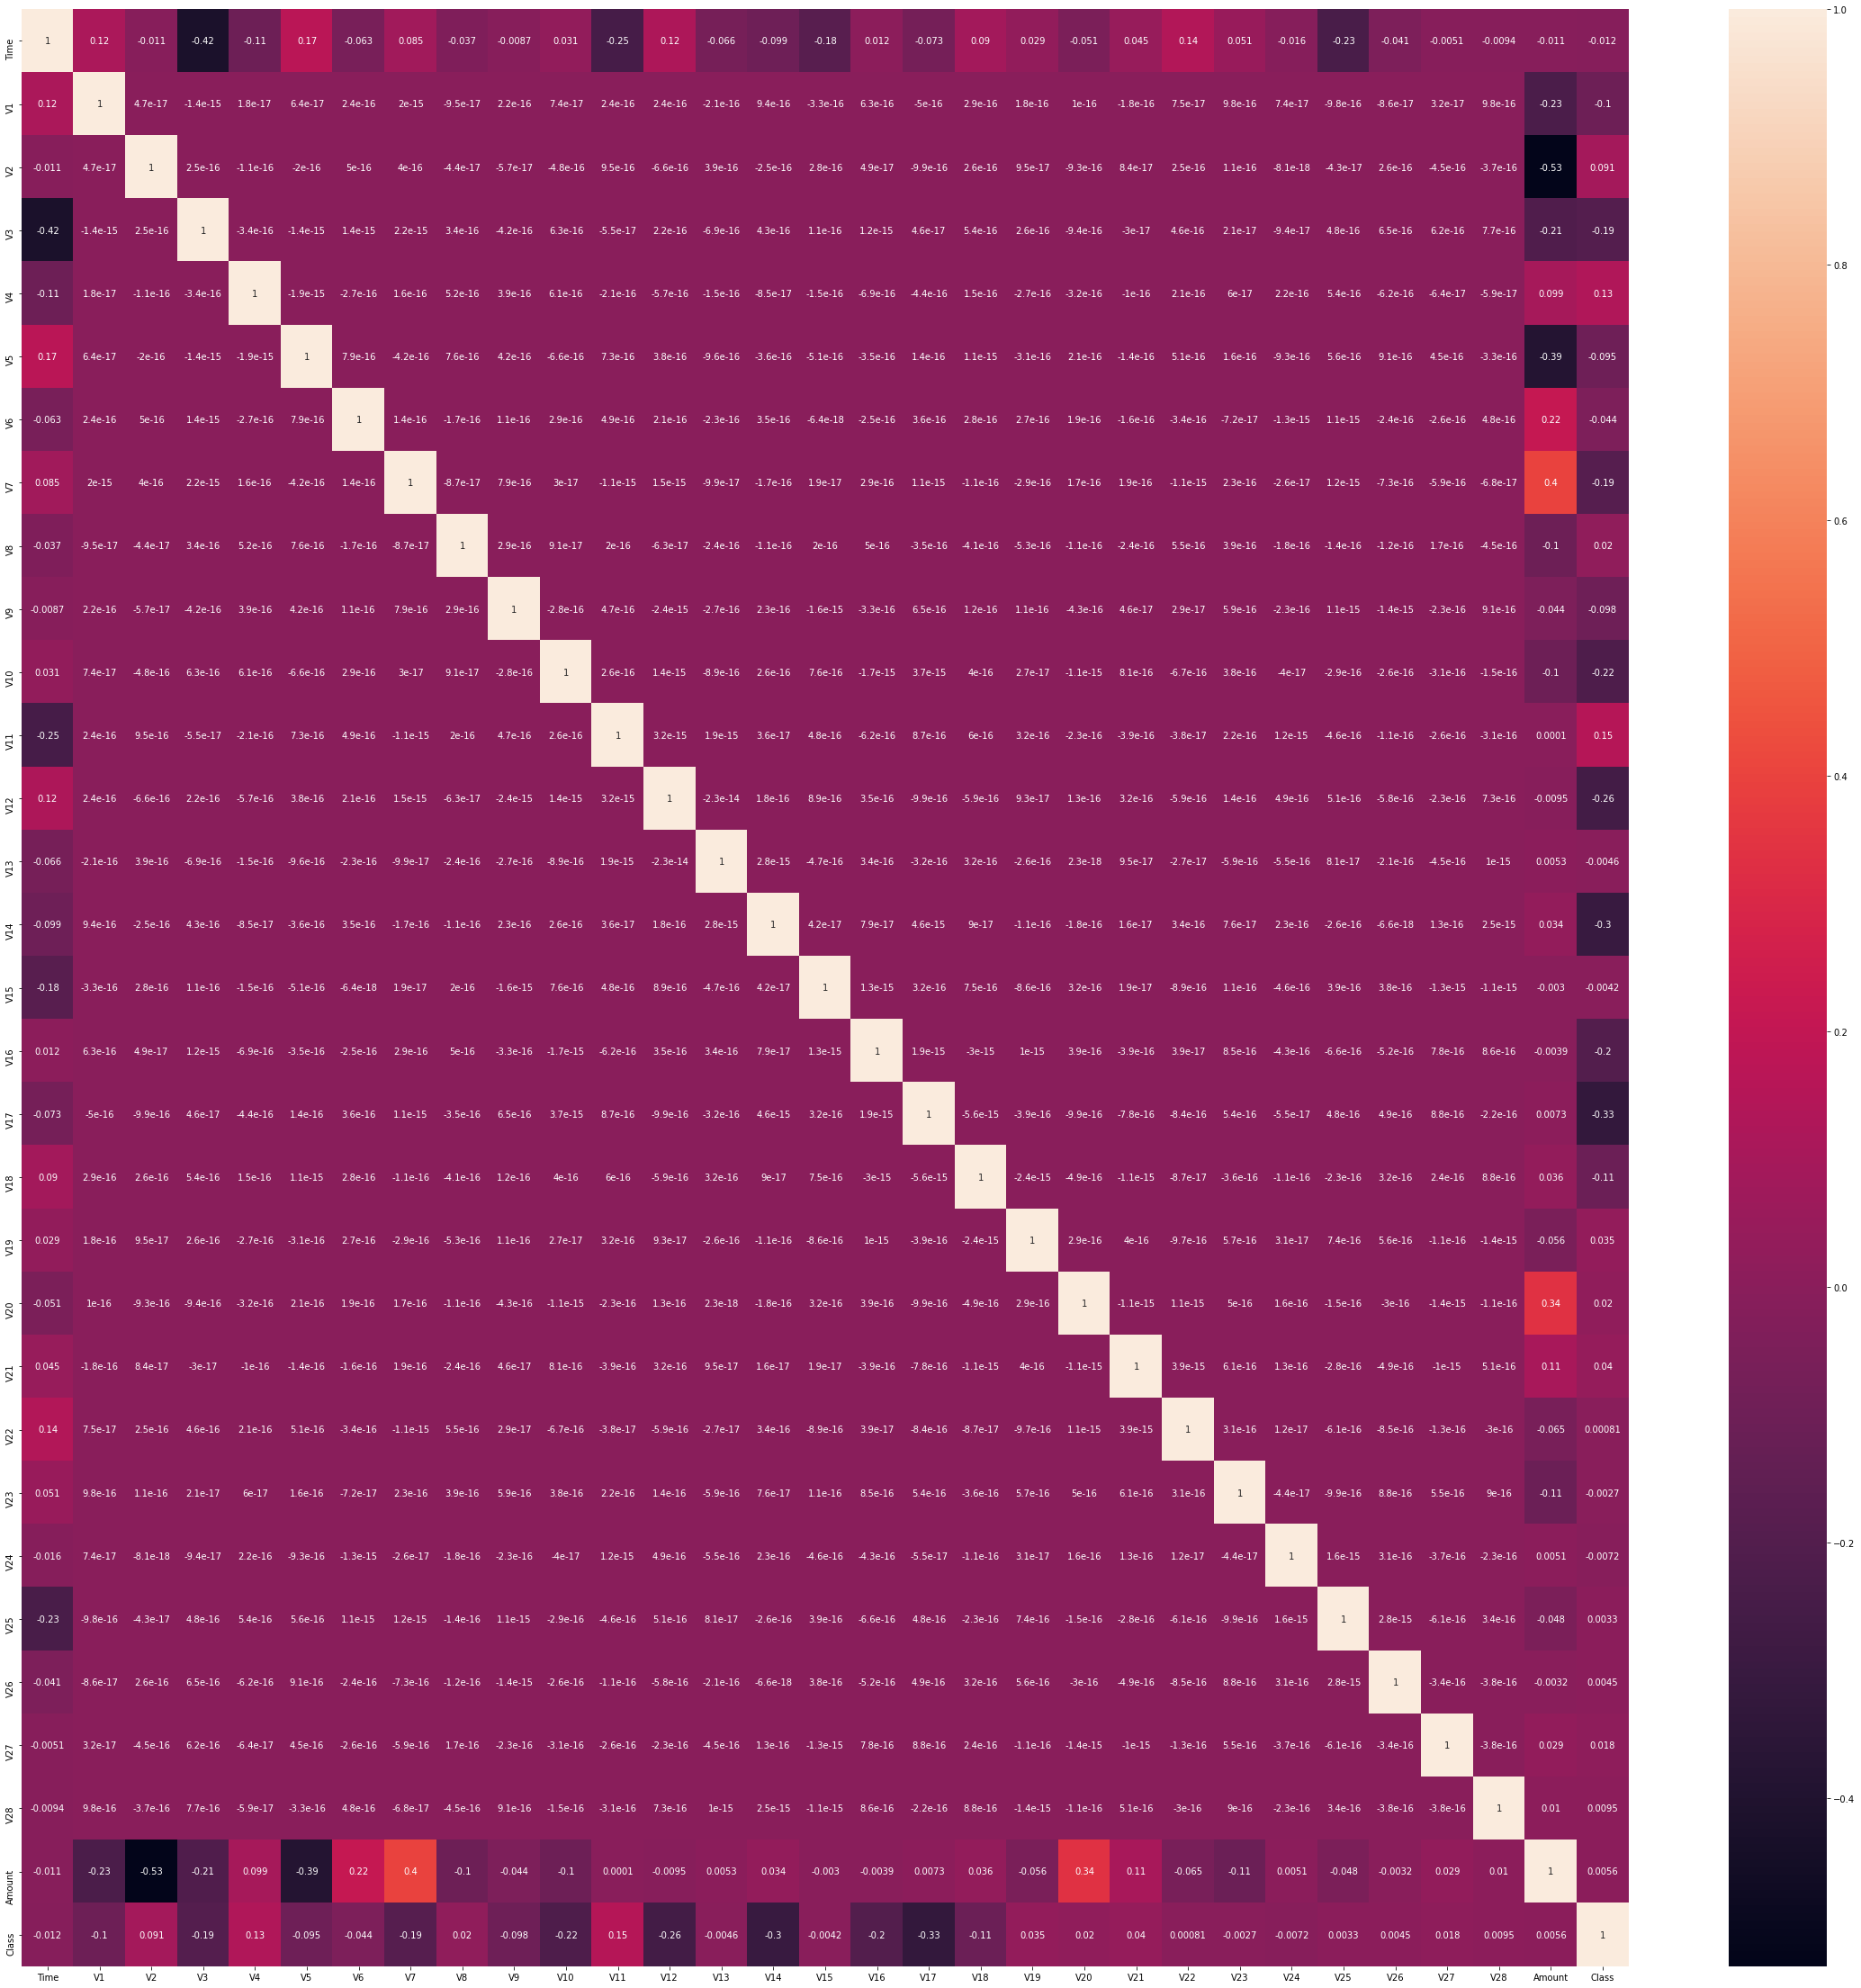

In [50]:
## Plot heatmap

# Let's see the correlation matrix 
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

#### Outlier Analysis of the Data

In [51]:
# Making a copy of the dataset
df_out = df.copy(deep = True)

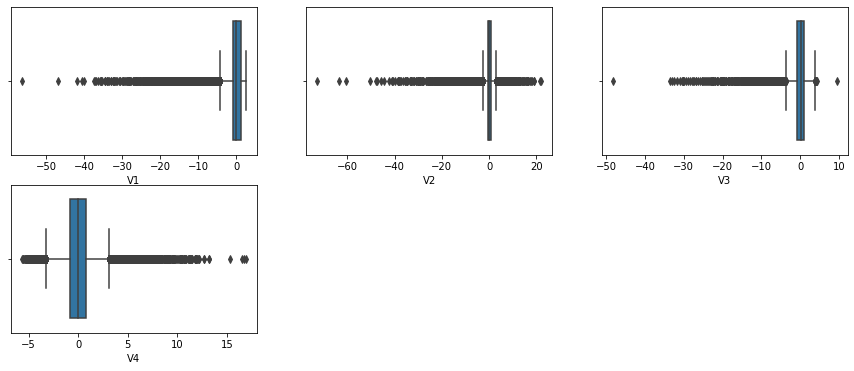

In [52]:
# Making boxplots as sub-plots to understand the trend of the data a few columns
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'V1', data = df_out)
plt.subplot(2,3,2)
sns.boxplot(x = 'V2', data = df_out)
plt.subplot(2,3,3)
sns.boxplot(x = 'V3', data = df_out)
plt.subplot(2,3,4)
sns.boxplot(x = 'V4', data = df_out)

In [53]:
# Viewing the distribution of the dataset
df_out.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here, we note that since PCA has already been performed on the column, we observe that the dataset does not have multicollinearity and the outlier analysis is acceptable as the data is the best representation of the original data, as PCA has already been performed on it.

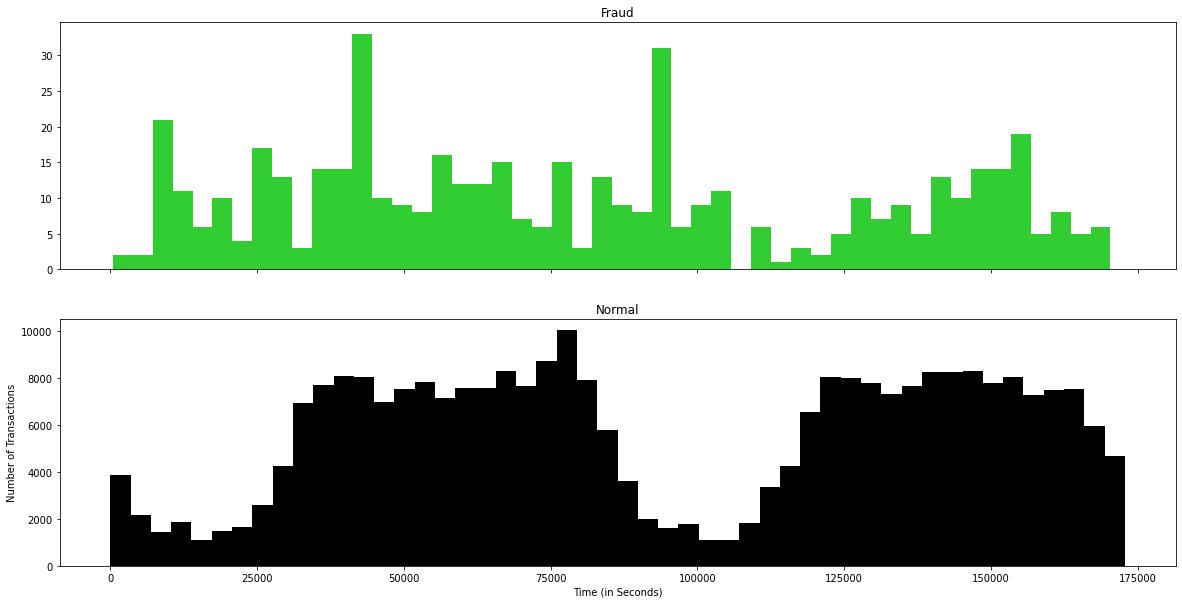

In [75]:
# Plotting the distribution of Normal and Fraudulent transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

# Binning the dataset
bins = 50

# plotting the normal transactions
ax2.hist(df.Time[df.Class == 0], bins = bins, color = 'black')
ax2.set_title('Normal')

# plotting the fraudulent transactions
ax1.hist(df.Time[df.Class == 1], bins = bins, color = 'limegreen')
ax1.set_title('Fraud')

# Adding the X-Axis label, the Y-Axis label and displaying the graph

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

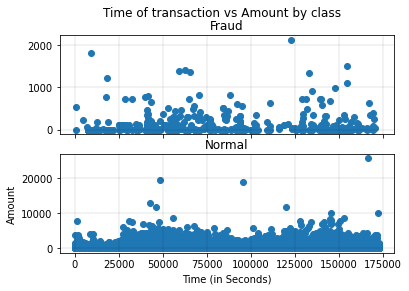

In [80]:
# Scatter Plot of Normal versus Fraud transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

# normal transactions
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

# fraud transactions
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

# Adding labels
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

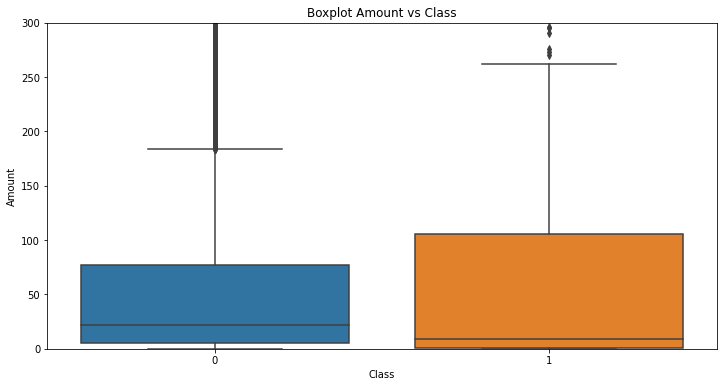

In [77]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = df)
ax.set_ylim([0, 300])
plt.title('Boxplot Amount vs Class')
plt.show()

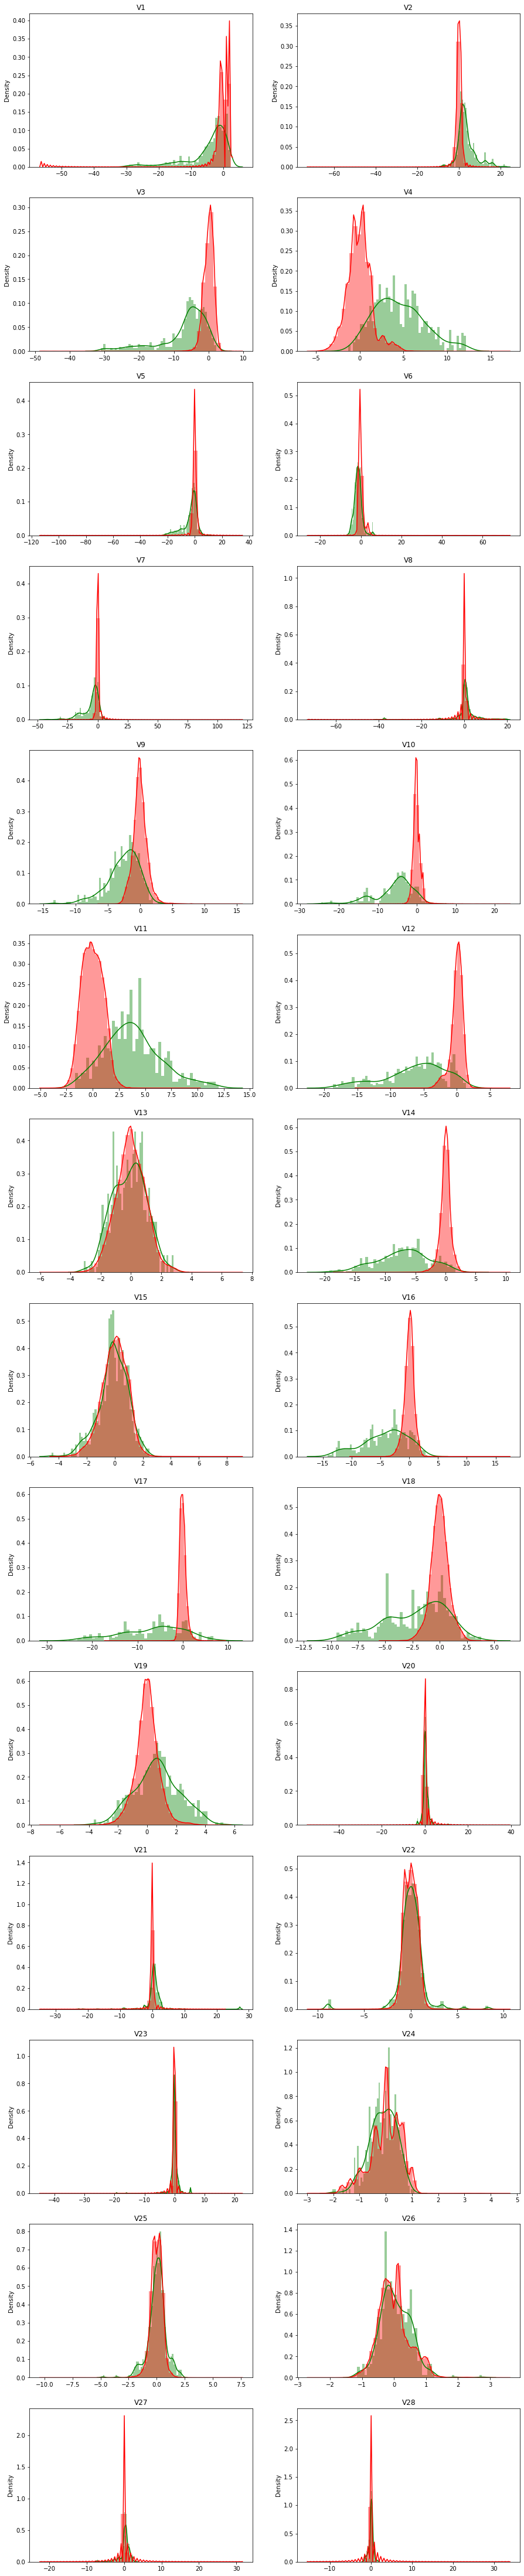

In [124]:
import matplotlib.gridspec as gridspec # to do the grid of plots

df_credit = df.copy(deep=True)
columns = df_credit.iloc[:,1:29].columns

fraudulent = df_credit.Class == 1
normaltrans = df_credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_credit[col][fraudulent], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df_credit[col][normaltrans], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

#### Checking for the skewness of data

In [95]:
# Understanding the skewness of the data
df.skew(axis = 0, skipna = True) 

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

From this, we notice that the following columns are skewed:
- V2
- V8
- V23
- V28

Now that we have completed EDA - univariate and bivariate analysis on the dataset, we shall proceed to handle the class imbalance.

Class imbalance for this notebook will be done via SMOTE. Since we are unsure as to whether a balanced or the original dataset will lead to better results, we shall perform the modelling on both the balanced and imbalanced dataset.

In [83]:
# Checkpoint for data
df_beforefeaturescaling = df.copy(deep = True) 

In [85]:
# Viewing the shape of the data
df.shape

(284807, 31)

In [86]:
# Viewing the head of the dataset
df_beforefeaturescaling.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [87]:
# Popping out the Class flag and renaming it as 'fraud_flag'
fraud_flag = df_beforefeaturescaling.pop("Class")

In [88]:
# Viewing the shape fo the data
df_beforefeaturescaling.shape

(284807, 30)

In [90]:
# Splitting the dataset into dependent and independent features (X and y)

X = df_beforefeaturescaling
y = fraud_flag

#### Splitting into train and test dataset

In [105]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [106]:
# Viewing the shape of the dataset
X_train.shape

(199364, 30)

In [107]:
# Viewing the shape of the dataset
y_test.shape

(85443,)

#### Dealing with Skewness of the dataset using Power Transformer


In [108]:
## We are using PowerTransformer to perform a Yeo-Johnson power transformation on our X-data
## in order to ensure that our features are normally distributed.

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame
pt_y.fit(y_train.to_frame())
 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

#### Feature Scaling
Here we have normalize the continous variable while keeping the binary values intact separately for train and test datasets

In [115]:
# Subsetting all the continous vairables for scaling
df = X_train
columnNames = list(df.columns.values)
contColumnNames = ['Amount', 'Time']

# Creating df with continuous variables
df_cont = df[contColumnNames]

## Creating scaled dataframe for modelling
normalized_df=(df_cont-df_cont.mean())/df_cont.std()
df = df.drop(contColumnNames, 1)
df = pd.concat([df,normalized_df],axis=1)

df.head()

X_train_scaled = df

In [116]:
# Subsetting all the continous vairables for scaling
df = X_test
columnNames = list(df.columns.values)
contColumnNames = ['Amount', 'Time']

# Creating df with continuous variables
df_cont = df[contColumnNames]

## Creating scaled dataframe for modelling
normalized_df=(df_cont-df_cont.mean())/df_cont.std()
df = df.drop(contColumnNames, 1)
df = pd.concat([df,normalized_df],axis=1)

df.head()

X_test_scaled = df

##### *Handling* Class Imbalance using SMOTE

In [117]:
from imblearn.over_sampling import SMOTE

## check sampling strategy again
sm = SMOTE(random_state=100, sampling_strategy='minority')
X_train_scaled, y_train = sm.fit_sample(X_train, y_train)